<span style="background-color: white; color: black; font-size: 20px; padding: 6px 10px; border-radius: 4px;">
implement linear regression on one feature of FuelConsumption data
</span>


In [358]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error

In [359]:
df = pd.read_csv('../data/FuelConsumption.csv')
df.sample(2)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
798,2014,MINI,COOPER S COUPE,TWO-SEATER,1.6,4,A6,Z,9.3,7.0,8.3,34,191
803,2014,MINI,COOPER S ROADSTER,TWO-SEATER,1.6,4,M6,Z,9.1,6.7,8.0,35,184


In [360]:
x = df[['FUELCONSUMPTION_COMB']].values
y = df['CO2EMISSIONS'].values
x, y

(array([[ 8.5],
        [ 9.6],
        [ 5.9],
        ...,
        [11.8],
        [11.3],
        [12.8]], shape=(1067, 1)),
 array([196, 221, 136, ..., 271, 260, 294], shape=(1067,)))

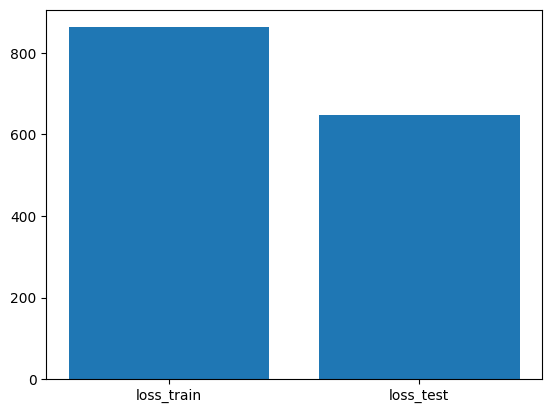

In [361]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
linear = LinearRegression()
linear.fit(x_train, y_train)
y_pred_train = linear.predict(x_train)
y_pred_test = linear.predict(x_test)

loss_train = mean_squared_error(y_train, y_pred_train)
loss_test = mean_squared_error(y_test, y_pred_test)

plt.bar(['loss_train', 'loss_test'], height=[loss_train, loss_test])
plt.show()

<span style="background-color: white; color: black; font-size: 20px; padding: 6px 10px; border-radius: 4px;">
choose best combination of these three features for linear regression
</span>


In [362]:
import itertools

In [363]:
cols = ['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']
combinations = []
for n_combination in range(1,len(cols)+1):
    # print(itertools(cols, n_combination))
    combinations.extend([list(x) for x in itertools.combinations(cols, n_combination)])

combinations

[['FUELCONSUMPTION_CITY'],
 ['FUELCONSUMPTION_HWY'],
 ['FUELCONSUMPTION_COMB'],
 ['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY'],
 ['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB'],
 ['FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'],
 ['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']]

In [364]:
y = df['CO2EMISSIONS'].values
linear = LinearRegression()
losses = []
for combination in combinations:
    x = df[combination].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
    linear.fit(x_train, y_train)
    y_pred_test = linear.predict(x_test)
    losses.append((','.join(combination),
                   mean_squared_error(y_test, y_pred_test),
                   root_mean_squared_error(y_test, y_pred_test),
                   mean_absolute_error(y_test, y_pred_test),
                   ))

df_losses = pd.DataFrame(losses, columns=['feature','MSE','RMSE','MAE'])
df_losses = df_losses.sort_values(by='RMSE').reset_index(drop=True)
df_losses


,feature,MSE,RMSE,MAE
0,"FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB",558.897110,23.641005,16.097995
1,"FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELC...",558.959393,23.642322,16.089095
2,"FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY",559.832329,23.660776,16.079540
3,"FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB",560.426725,23.673334,16.085143
4,FUELCONSUMPTION_CITY,562.911353,23.725753,16.113739
5,FUELCONSUMPTION_COMB,646.978272,25.435768,17.361294
6,FUELCONSUMPTION_HWY,903.814382,30.063506,21.382238


<span style="background-color: white; color: black; font-size: 20px; padding: 6px 10px; border-radius: 4px;">
privious instance with kfold and cross validation
</span>


In [365]:
from sklearn.model_selection import cross_validate, KFold

In [366]:
kfold = KFold(n_splits=5, shuffle=True, random_state=7)
scores = {
    'MSE':'neg_mean_squared_error',
    'RMSE':'neg_root_mean_squared_error',
    'MAE':'neg_mean_absolute_error'
}

y = df['CO2EMISSIONS'].values
linear = LinearRegression()
losses = []
for combination in combinations:
    x = df[combination].values
    validation = cross_validate(linear, x, y, scoring=scores, return_train_score=False)
    score = []
    keys = list(validation.keys())
    for key in keys[2:]:
        score.append(np.abs(validation[key].mean()))
    losses.append((','.join(combination),*score))

df_losses = pd.DataFrame(losses, columns=['feature','MSE','RMSE','MAE'])
df_losses = df_losses.sort_values(by='RMSE').reset_index(drop=True)
df_losses

,feature,MSE,RMSE,MAE
0,FUELCONSUMPTION_CITY,844.557923,28.042365,19.908351
1,"FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB",844.474931,28.055528,19.873533
2,"FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY",844.454792,28.056593,19.877403
3,"FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB",844.668685,28.057993,19.876556
4,"FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELC...",845.756492,28.081245,19.903189
5,FUELCONSUMPTION_COMB,909.469520,29.132005,20.886967
6,FUELCONSUMPTION_HWY,1163.344912,33.349718,24.805017
